# Zomato Restaurant Analysis 

#### Project Overview

The restaurant industry significantly shapes regional culinary cultures, influenced by urbanization and increasing dining-out trends. This study utilizes a Zomato dataset to analyze consumer preferences, spending habits, and service expectations in India. Starting with over 200,000 rows, data cleaning narrowed it down to 55,000 unique restaurants, ensuring accurate insights. Through exploratory data analysis (EDA), the research identifies patterns in restaurant distribution, types, cuisine preferences, and pricing, providing valuable information for restaurateurs and investors. The study aims to highlight growth opportunities and identify profitable restaurant types in India.

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

C:\Users\mayur\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\mayur\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


### Load the dataset


In [2]:
df=pd.read_csv("zomato_restaurants_in_India.csv")
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


# Dataset Overview & Cleaning

In [3]:
df.shape

(211944, 26)

In [4]:
df['res_id'].nunique()

55568

###  Remove duplicate restaurant entries based on 'res_id'

In [5]:
df.drop_duplicates('res_id',keep='first',inplace=True)

In [6]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [7]:
df.set_index('res_id',inplace=True)

In [8]:
df.sample()

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18882023,Underworld Cafeteria,['Café'],https://www.zomato.com/raipur/underworld-cafet...,"Near medihealth hospital, Ravi shankar shukla...",Raipur,11310,Amanaka,21.250932,81.596814,492001,...,1,Rs.,"['Delivery', 'Cash', 'Takeaway Available', 'In...",3.5,Good,112,13,0.0,1,-1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 3400299 to 3201138
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   url                   55568 non-null  object 
 3   address               55550 non-null  object 
 4   city                  55568 non-null  object 
 5   city_id               55568 non-null  int64  
 6   locality              55568 non-null  object 
 7   latitude              55568 non-null  float64
 8   longitude             55568 non-null  float64
 9   zipcode               10945 non-null  object 
 10  country_id            55568 non-null  int64  
 11  locality_verbose      55568 non-null  object 
 12  cuisines              55098 non-null  object 
 13  timings               54565 non-null  object 
 14  average_cost_for_two  55568 non-null  int64  
 15  price_range     

In [10]:
df.isnull().sum()

name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

### Statistical Analysis 

In [11]:
df.describe().round(2)

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.00,55568.00,55568.00,55568.0,55568.00,55568.00,55568.00,55568.00,55568.00,55556.0,55568.00,55568.0
mean,3409.50,21.45,76.50,1.0,528.21,1.71,2.96,223.33,160.97,0.0,-0.35,-1.0
std,5174.94,42.90,10.98,0.0,595.03,0.88,1.46,618.22,586.98,0.0,0.93,0.0
min,1.00,0.00,0.00,1.0,0.00,1.00,0.00,-18.00,0.00,0.0,-1.00,-1.0
25%,8.00,16.52,74.65,1.0,200.00,1.00,2.90,6.00,1.00,0.0,-1.00,-1.0
50%,26.00,22.47,77.11,1.0,350.00,1.00,3.50,35.00,10.00,0.0,-1.00,-1.0
75%,11294.00,26.75,79.83,1.0,600.00,2.00,3.90,175.00,69.00,0.0,1.00,-1.0
max,11354.00,10000.00,91.83,1.0,30000.00,4.00,4.90,42539.00,17702.00,0.0,1.00,-1.0


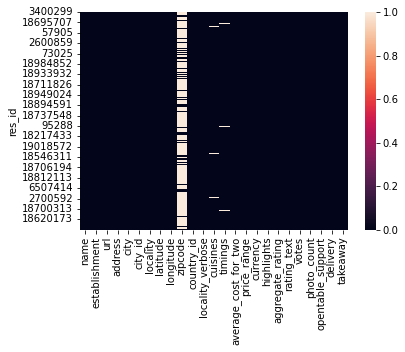

In [12]:
sns.heatmap(df.isna())
plt.show()

In [13]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [14]:
df['establishment'].nunique()

27

### Cleaning Establishment Names

In [15]:
df['establishment']=df['establishment'].apply(lambda x:x[2:-2])

In [16]:
df['establishment']=df['establishment'].apply(lambda x:np.where(x=="","Other Establishments",x))

In [17]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'Other Establishments', 'Shack',
       'Club', 'Food Court', 'Mess', 'Butcher Shop', 'Microbrewery',
       'Cocktail Bar', 'Pop up', 'Irani Cafe'], dtype=object)

In [18]:
df['zipcode'].fillna('Others',inplace = True)

In [19]:
df['zipcode'].isna().sum()

0

In [20]:
df['timings'].nunique()

7740

In [21]:
df['currency']

res_id
3400299     Rs.
3400005     Rs.
3401013     Rs.
3400290     Rs.
3401744     Rs.
           ... 
19142822    Rs.
18984164    Rs.
18019952    Rs.
3200996     Rs.
3201138     Rs.
Name: currency, Length: 55568, dtype: object

# Exploratory Data Analysis (EDA)

### Top and Bottom Cities with Restaurants

In [22]:
# Top 20 Cities
top_20_Cities=df['city'].value_counts().head(20).reset_index()
top_20_Cities

,city,count
0,Bangalore,2247
1,Mumbai,2022
2,Pune,1843
3,Chennai,1827
4,New Delhi,1704
5,Jaipur,1395
6,Kolkata,1361
7,Ahmedabad,1247
8,Goa,1150
9,Lucknow,1135


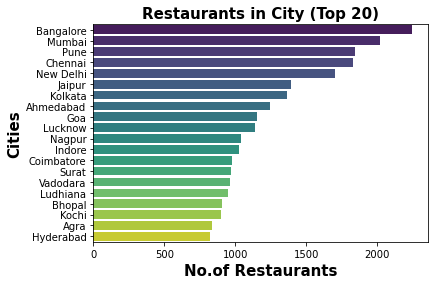

In [23]:
sns.barplot(y='city',x='count',data=top_20_Cities,palette='viridis')
plt.title('Restaurants in City (Top 20)',fontsize=15,fontweight='bold')
plt.xlabel('No.of Restaurants',fontsize=15,fontweight='bold')
plt.ylabel('Cities',fontsize=15,fontweight='bold')
plt.show()

##### The bar graph showing the top 20 cities ranked by number of Restaurants ,here are some insights:

 * Bangalore and Mumbai have the highest number of restaurants among the cities listed.
 * There is a noticeable drop after Bangalore and Mumbai in the number of restaurants for the next group of cities like Pune, Chennai, and New Delhi,Jabalpur
 * The cities towards the bottom of the graph like Kochi, Agra, and Hyderabad have relatively fewer restaurants compared to the top cities.
 * As you can see that metro cities have more number of restaurants than others with South India dominating the Top 4 (Bangalore, Pune , Mumbai, Chennai)

In [24]:
# Bottom 10 Cities
bottom_10_Cities=df['city'].value_counts().tail(10).reset_index()
bottom_10_Cities 

,city,count
0,Gandhinagar,96
1,Secunderabad,90
2,Ghaziabad,90
3,Nasik,83
4,Faridabad,79
5,Udupi,60
6,Howrah,50
7,Neemrana,26
8,Greater Noida,21
9,Nayagaon,15


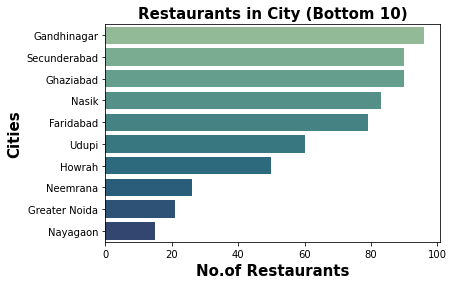

In [25]:
sns.barplot(y='city',x='count',data=bottom_10_Cities,palette='crest')
plt.title('Restaurants in City (Bottom 10)',fontsize=15,fontweight='bold')
plt.xlabel('No.of Restaurants',fontsize=15,fontweight='bold')
plt.ylabel('Cities',fontsize=15,fontweight='bold')
plt.show()

* There's a significant disparity between cities, from around 10 restaurants in Nayagaon to nearly 100 in Gandhinagar. This large variation suggests that different factors strongly influence restaurant presence across cities.
* Gandhinagar and Secunderabad stand out with over 90 restaurants each, far exceeding other cities. This could indicate favorable conditions for the restaurant industry in these locations, such as higher population, economic prosperity, or tourism.
* The cities fall into roughly three tiers - high (80-100 restaurants), medium (60-80), and low (0-60). This clustering might reflect broader patterns related to urbanization, economic development, or regional differences.
* Generally, larger or more well-known cities have more restaurants, while smaller or less prominent cities have fewer. This trend likely reflects population differences and varying levels of urban development.

### Top 20 Restaurant Chains in India by Number of Outlets


In [26]:
top_20_name=df['name'].value_counts().head(20).reset_index()
top_20_name

,name,count
0,Domino's Pizza,399
1,Cafe Coffee Day,315
2,KFC,204
3,Baskin Robbins,202
4,Keventers,189
5,Subway,178
6,McDonald's,130
7,Pizza Hut,125
8,Barbeque Nation,112
9,Burger King,110


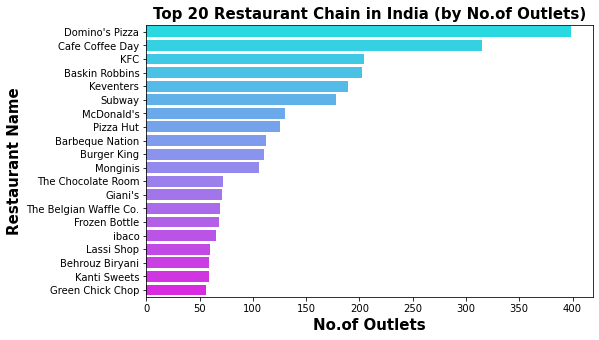

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(y='name',x='count',data=top_20_name,palette='cool')
plt.title('Top 20 Restaurant Chain in India (by No.of Outlets)',fontsize=15,fontweight='bold')
plt.xlabel('No.of Outlets',fontsize=15,fontweight='bold')
plt.ylabel('Restaurant Name',fontsize=15,fontweight='bold')
plt.show()

* Domino's Pizza is the clear leader with 399 outlets, followed closely by Cafe Coffee Day with 315 outlets. This suggests a strong consumer preference for pizza and coffee chains in India.
* The top 5 chains are dominated by international fast food brands (Domino's, KFC, McDonald's) and cafe chains (Cafe Coffee Day, Baskin Robbins). This indicates a significant market for quick-service restaurants in India.
* The list includes a mix of cuisines and concepts - from pizza and burgers to ice cream, coffee, and Indian specialties like biryani and lassi. This diversity reflects the varied food preferences of Indian consumers.
* While many top chains are international brands, there's a strong presence of Indian brands like Cafe Coffee Day, Keventers, and Barbeque Nation. This suggests a competitive market where local chains can thrive alongside global giants.
* There's a significant drop in outlet numbers after the top few chains. For example, Domino's has nearly 4 times as many outlets as the 10th-ranked chain (Monginis). This indicates a highly concentrated market at the top end.

### Top 10 Restaurants by establishment type

In [28]:
by_establishment=df['establishment'].value_counts().head(10).reset_index()
by_establishment

,establishment,count
0,Quick Bites,14032
1,Casual Dining,12270
2,Café,4123
3,Bakery,3741
4,Dessert Parlour,3675
5,Sweet Shop,2615
6,Beverage Shop,2440
7,Other Establishments,1830
8,Fine Dining,1535
9,Food Court,1494


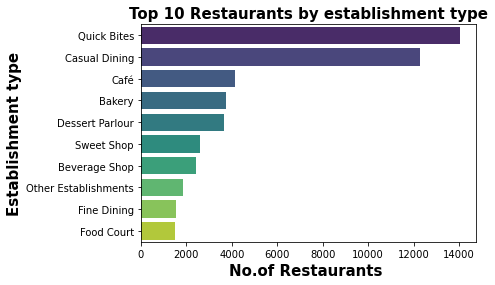

In [29]:
sns.barplot(y='establishment',x='count',data=by_establishment,palette='viridis')
plt.title('Top 10 Restaurants by establishment type',fontsize=15,fontweight='bold',color='black')
plt.xlabel('No.of Restaurants ',fontsize=15,fontweight='bold')
plt.ylabel('Establishment type',fontsize=15,fontweight='bold')
plt.show()

* Quick Bites and Casual Dining dominate with the highest number of outlets, reflecting consumer preference for fast and casual meals.
* Cafés and Bakeries are also popular, driven by youth culture and social hangout trends.
* Dessert Parlours and Sweet Shops highlight a growing demand for niche sweet offerings.
* Fine Dining is less common, indicating it caters to a smaller, premium market segment.

### Top 10 Restaurants by cuisines type

In [30]:
by_cuisines=df['cuisines'].value_counts().head(10).reset_index()
by_cuisines

,cuisines,count
0,North Indian,4295
1,Fast Food,2025
2,"North Indian, Chinese",1636
3,Bakery,1585
4,South Indian,1489
5,Street Food,1187
6,Cafe,1098
7,Mithai,1020
8,Desserts,922
9,"Bakery, Desserts",836


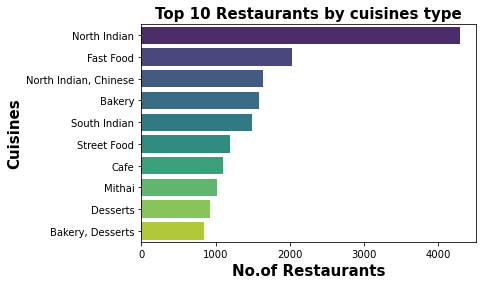

In [31]:
sns.barplot(y='cuisines',x='count',data=by_cuisines,palette='viridis')
plt.title('Top 10 Restaurants by cuisines type',fontsize=15,fontweight='bold',color='black')
plt.xlabel('No.of Restaurants',fontsize=15,fontweight='bold')
plt.ylabel('Cuisines',fontsize=15,fontweight='bold')
plt.show()

* The bar graph presents number of restaurants categorized by cuisines type they serve.
* The chart shows that North Indian cuisine has the highest number of restaurants around 4500+ which is followed by Fast Food 2000+ and a combination of North Indian 1800+, Chinese cuisines.
* Chinese food comes second in the list of cuisines that Indians prefer,more than fast food, desserts and South Indian food.
* Other notable categories include Bakery, South Indian, Street Food.

### Number of Restaurants by Price Range


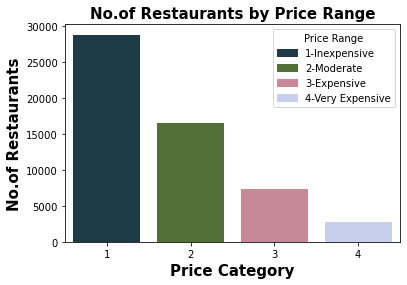

In [32]:
ax=sns.countplot(x='price_range',data=df,palette='cubehelix')

plt.title('No.of Restaurants by Price Range',fontsize=15,fontweight='bold')
plt.xlabel('Price Category',fontsize=15,fontweight='bold')
plt.ylabel('No.of Restaurants',fontsize=15,fontweight='bold')
handles = [plt.Rectangle((0, 0), 1, 1, color=bar.get_facecolor()) for bar in ax.patches[:4]]
labels = ['1-Inexpensive', '2-Moderate', '3-Expensive', '4-Very Expensive']

plt.legend(handles, labels, title='Price Range', loc='upper right')

plt.show()

* Price Category 1 (Inexpensive) has the highest number of restaurants, followed by Price Category 2 (Moderate).
* Price Category 3 (Expensive) and Price Category 4 (Very Expensive) have significantly lower numbers of restaurants compared to the first two categories.
* The number of restaurants decreases as the price category increases, indicating a higher demand for more affordable dining options.

### Luxury Restaurants: Top 10 by Cost

In [33]:
luxury=df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(10).reset_index()
luxury

,name,establishment,city,average_cost_for_two
0,Ocean - The Private Dining Room - Sahara Star,Fine Dining,Mumbai,30000
1,Gol Bungalow - Taj Falaknuma Palace,Fine Dining,Hyderabad,15000
2,Bhairo,Fine Dining,Udaipur,15000
3,Fly Dining,Fine Dining,Bangalore,14000
4,Trophy Bar- Umaid Bhawan Palace,Bar,Jodhpur,12000
5,Pillars - Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
6,Risala- Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
7,Wasabi By Morimoto - The Taj Mahal Palace,Fine Dining,Mumbai,10000
8,Whiskys - Deltin Royale,Bar,Goa,8000
9,Adaa - Taj Falaknuma Palace,Fine Dining,Hyderabad,8000


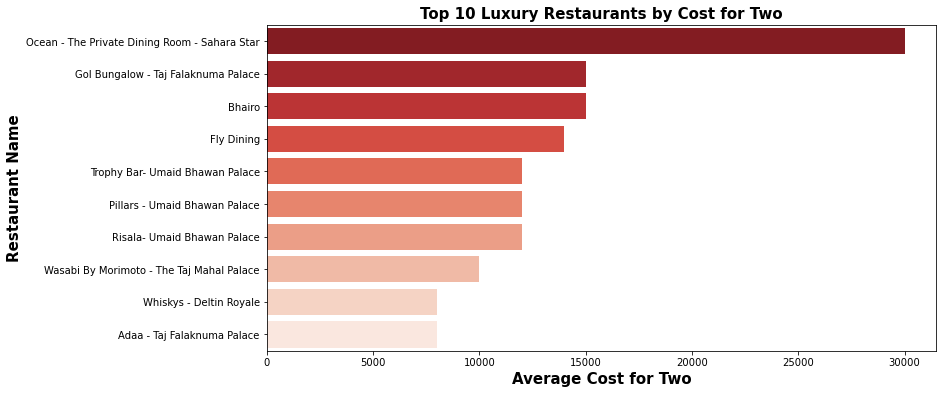

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(y='name', x='average_cost_for_two', data=luxury, palette='Reds_r')
plt.title('Top 10 Luxury Restaurants by Cost for Two', fontsize=15, fontweight='bold')
plt.xlabel('Average Cost for Two', fontsize=15, fontweight='bold')
plt.ylabel('Restaurant Name', fontsize=15, fontweight='bold')
plt.show()

* Ocean - The Private Dining Room, Sahara Star is the most expensive restaurant on the list, with an average cost for two of around 30,000 rupees.
* The other restaurants on the list also have high average costs, ranging from 10,000 to 25,000 rupees.
* Umaid Bhawan Palace has three restaurants in the top 10, indicating its reputation for luxury dining.
* Taj Falaknuma Palace also has multiple restaurants on the list.

### Aggregate Ratings Comparison Across Different Establishment Types


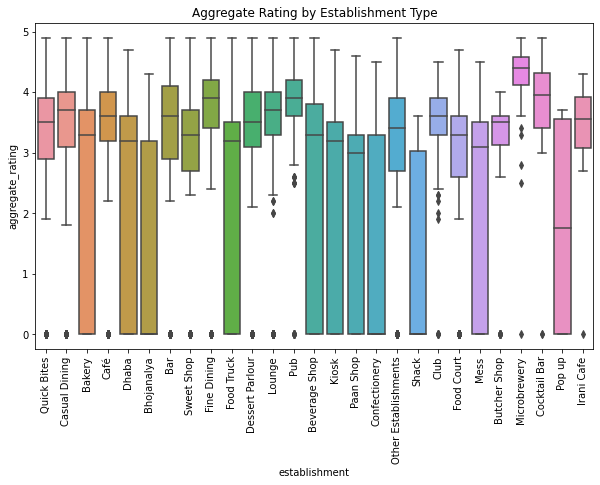

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='establishment', y='aggregate_rating', data=df.explode('establishment'))
plt.xticks(rotation=90)
plt.title('Aggregate Rating by Establishment Type')
plt.show()

* Fine Dining establishments have the highest median aggregate rating, indicating they generally receive higher ratings from customers.
* Quick Bites and Cafe establishments have the lowest median aggregate ratings, suggesting they may need to improve their customer experience.
* The interquartile range (IQR), represented by the box, varies across different establishment types. A larger IQR indicates a wider range of ratings, while a smaller IQR suggests more consistent ratings.
* There are outliers in some establishment types, such as Food Court and Bar, indicating these types have some establishments with significantly higher or lower ratings than the rest.

### Analyzing the Relationship Between Price Range and Aggregate Ratings



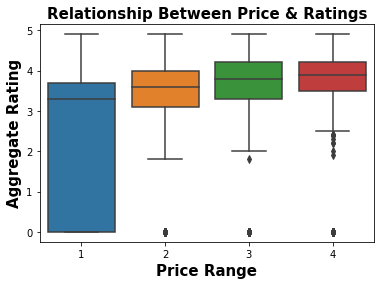

In [36]:
sns.boxplot(x='price_range',y='aggregate_rating',data=df)

plt.title("Relationship Between Price & Ratings",fontsize=15,fontweight='bold')
plt.xlabel("Price Range",fontsize=15,fontweight='bold')
plt.ylabel("Aggregate Rating",fontsize=15,fontweight='bold')
plt.show()

* As the price range increases from 1 to 4, the median aggregate rating also increases. This suggests that more expensive options tend to receive higher ratings on average.
* The first price range (price range = 1) has a significantly wider interquartile range (IQR) compared to the other price ranges. This indicates that cheaper restaurants or products have a larger variation in ratings, ranging from very low to moderately high.
* The price ranges 3 and 4 show narrower boxes (smaller IQRs), which means that the ratings for more expensive items or restaurants tend to be more consistent, clustering around higher values.
* While the higher price ranges (3 and 4) have higher median ratings, there are a few outliers present, indicating that even expensive restaurants can occasionally receive lower ratings.

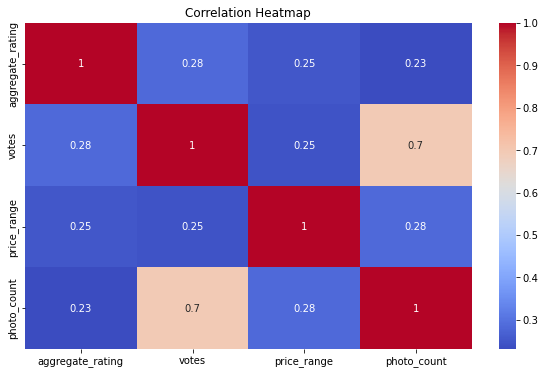

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['aggregate_rating', 'votes', 'price_range', 'photo_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* Votes and Photos are highly correlated, meaning more popular restaurants tend to have more photos.
* The relationships between rating, votes, and price range are positive but relatively weak.
* The heatmap is useful to understand how different factors (rating, votes, pricing, photos) interact with each other in the context of the Zomato dataset.

### Service Availability

In [38]:
def check(input_list):
    if 'Delivery' in input_list:
        return 'Delivery Available'
    elif 'Takeaway Available' in input_list:
        return 'Takeaway Available'
    else:
        return 'No Delivery Available'

In [39]:
ff=df['highlights'].apply(check).value_counts().reset_index()
ff

,highlights,count
0,Takeaway Available,24769
1,Delivery Available,23907
2,No Delivery Available,6892


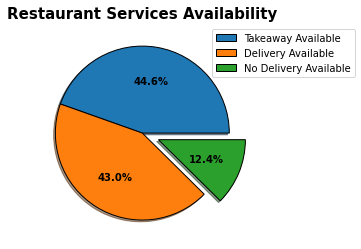

In [40]:
ex = [0.0, 0.0, 0.2]
plt.pie(
    ff['count'],
    explode=ex,
    autopct='%1.1f%%',
    shadow=True,
    radius=1,
    textprops={"fontsize": 10, "fontweight": 'bold'},
    wedgeprops={"linewidth": 1, "edgecolor": 'black'},
    rotatelabels=False
)
plt.title("Restaurant Services Availability", fontsize=15, fontweight='bold')
plt.legend(labels=ff['highlights'], loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

* The pie chart shows the Restaurant Service Availability. the pie chart is divided ito three slices.
* “Take away Availability”, “Delivery Available” & “no delivery Available”.
* The slice labelled with “Take away Availability” accounts for 44.6% of restaurants. This shows that almost half of the restaurants offering takeaway service.
* The slice labelled with “Delivery Available” accounts for 43.0% of restaurants. This shows that almost half of the restaurants provide Delivery services.
* The slice labelled with “no delivery Available” accounts for 12.4% of restaurants. Are no providing takeaways and delivery services maybe these restaurants are in the category of most expensive restaurants.

# Conclusion 

By analysing this dataset uncovered various insights from the data we find out top 20 cities, top cuisines, price categories, relationship between price and categories. Most expensive restaurants, service availability like take aways available, delivery and no delivery available. these insights provide comprehensive understanding about the restaurant industry in our India which helps to make strategic decisions and also help to our stakeholders to take decisions. Overall These insights provide a comprehensive understanding of the restaurant landscape. In summary, the analysis provided insights into the characteristics of restaurants across India, including their geographic distribution, establishment types, cuisines, pricing, and delivery/takeaway services. The data cleaning and exploratory analysis highlighted important patterns and trends within the dataset.